### About the Data  
<img src='../Images/Others/amazon_logo.png' width='250' height='170' style="float: left;margin:5px 20px 5px 1px" >
A list of 3150 Amazon customers reviews for Alexa Echo, Firestick, Echo Dot etc.

This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis. 

Thanks Anurag Bhatt and Manu Siddhartha for the [dataset](https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews). 

You can find the dataset on `../Datasets/Reviews.csv`.

In [9]:
# libraries
import pandas as pd 
import numpy as np 
import squarify
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
from nltk.corpus import stopwords
import nltk 
import re
import string
from wordcloud import WordCloud

In [10]:
path = '../Datasets/Reviews.csv'
df = pd.read_csv(path, index_col=[0])

df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,3150.0,4.463175,1.068506,1.0,4.0,5.0,5.0,5.0
feedback,3150.0,0.918413,0.273778,0.0,1.0,1.0,1.0,1.0


In [12]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

Examine the rating (target) values.

In [13]:
rating_counts = df['rating'].value_counts().sort_values(ascending=False)
rating_counts

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

As you can see we have 5 different rate stuffs theese are 5 that is best to 0 that is worst.

In [14]:
rates = rating_counts.index
quantity = rating_counts.values

print(rates, '\n', quantity)

Int64Index([5, 4, 1, 3, 2], dtype='int64') 
 [2286  455  161  152   96]


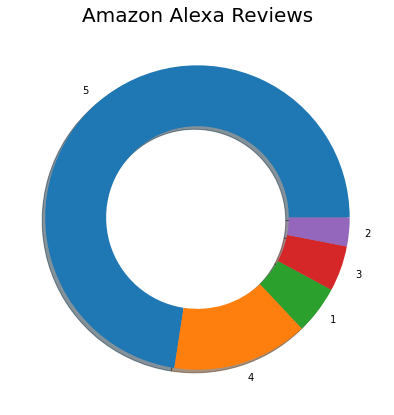

<Figure size 432x288 with 0 Axes>

In [15]:
%matplotlib inline

wedge_properties = {"width":0.4 }

plt.figure(figsize=(7,7)) 
plt.pie(quantity, labels=rates, shadow=True, pctdistance=0.7, wedgeprops=wedge_properties)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.savefig('../Images/Plots/rating_donut.jpg')
plt.figure(facecolor='#94F008')
plt.show()

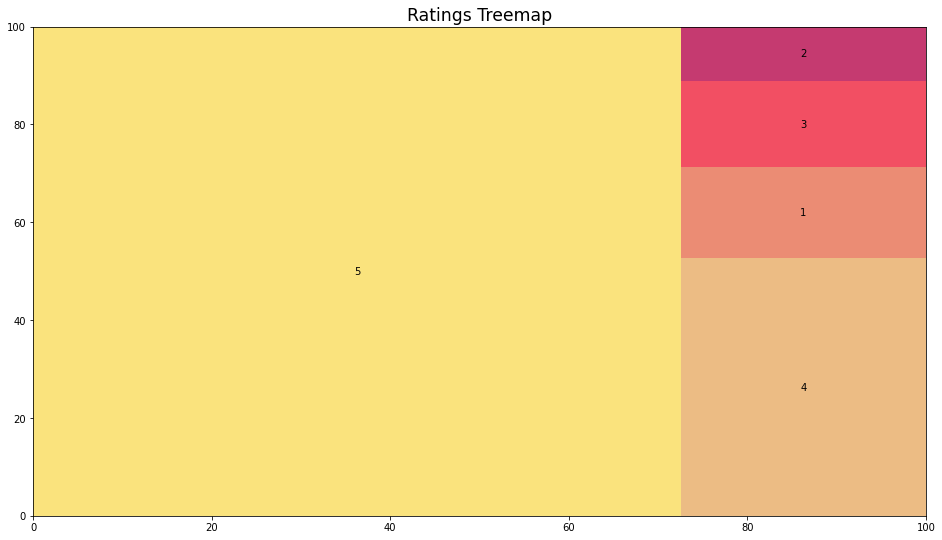

In [16]:
import squarify

%matplotlib inline 

rate_df = pd.DataFrame({'Rates':rates,
                        'Quantity':quantity})

colors=['#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

fig, ax = plt.subplots(figsize=(16,9))
squarify.plot(sizes=rate_df['Quantity'], label=rate_df['Rates'],
            alpha=.8, color=colors)
ax.set_title('Ratings Treemap', fontsize='xx-large')
fig.savefig('../Images/Plots/rating_treemap.jpg')
plt.show()

Most of customers liked the Alexa! But there is a stiuation that called feedback. Which feedbacks goes to which rates. 

In [17]:
sankey_df = df.groupby(['feedback', 'rating']).size()
sankey_df = sankey_df.reset_index(name='counts')

sankey_df.loc[0:1,'feedback']=0
sankey_df.loc[2:,'feedback']=1

sankey_df.head()

,feedback,rating,counts
0,0,1,161
1,0,2,96
2,1,3,152
3,1,4,455
4,1,5,2286


In [18]:
import plotly.graph_objects as go

%matplotlib inline

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Feedback 1-0', "1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"],
      color = [ "#f71b1b", "#1b7ef7", "#f3f71b", "#12e23f", "#f78c1b", "#f79c1b"]
    ),
    link = dict(
      source = sankey_df["feedback"], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = sankey_df["rating"],
      value = sankey_df['counts']
  ))])

fig.update_layout(title_text="Which Feedback Goes to Which Rating", font_size=15)
fig.write_html('../Static/static_sankey.html')
fig.show()

lets explore the words, which words most used by reviewers? 
Before examine the words, we should clean up to some stuffs.

In [19]:
from nltk.corpus import stopwords
import nltk 
import re
import string

nltk.download('stopwords')

stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df["verified_reviews"] = df["verified_reviews"].apply(clean_text)
df["verified_reviews"].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ramaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                            love echo
1                                                 love
2    sometim play game answer question correct alex...
3    lot fun thing  yr old learn dinosaur control l...
4                                                music
Name: verified_reviews, dtype: object

In [20]:
words = []
for i in df['verified_reviews']:
    item = i.split(" ")
    words.append(item)

words = [word for list_item in words for word in list_item]
words[:5]

['love', 'echo', 'love', 'sometim', 'play']

Now we can visualize the words.

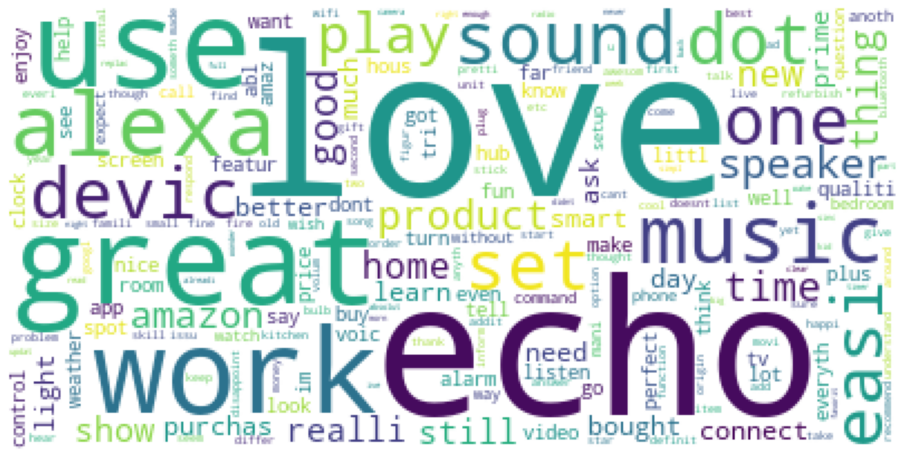

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

text = ' '.join(words)

plt.figure(figsize=(16,9))
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(wordcloud, cmap="plasma")
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('../Images/Plots/word_cloud.png', dpi=200)
plt.show()

We can say most of of the people who bought it liked Alexa.